In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
path = os.getcwd()+"/Data12/"
os.listdir(path)

['.DS_Store', 'pizzasize.txt', 'pizzasize.csv']

# Načtení dat

In [3]:
data = pd.read_csv(path + "pizzasize.csv")

In [5]:
data.set_index("ID", inplace=True)

In [6]:
data.head(5)

,Store,CrustDescription,Topping,Diameter
ID,,,,
1,Dominos,ThinNCrispy,Supreme,29.40
2,Dominos,ThinNCrispy,BBQMeatlovers,29.63
3,Dominos,DeepPan,Hawaiian,27.06
4,Dominos,ThinNCrispy,Supreme,27.45
5,Dominos,ClassicCrust,Hawaiian,26.59


In [7]:
store1, store2 = pd.unique(data["Store"])
print(store1, store2)

Dominos EagleBoys


In [8]:
data_np = np.array(data)

# Rozdělení dat podle řetězců

In [9]:
data_Dominos = np.array([i for i in data_np if i[0]==store1])
data_EagleBoys = np.array([i for i in data_np if i[0]==store2])

# Přejmenování

In [11]:
np.unique(data_Dominos[:,1])

array(['ClassicCrust', 'DeepPan', 'ThinNCrispy'], dtype=object)

In [12]:
np.unique(data_EagleBoys[:,1])

array(['DeepPan', 'MidCrust', 'ThinCrust'], dtype=object)

In [13]:
np.unique(data_Dominos[:,2])

array(['BBQMeatlovers', 'Hawaiian', 'Supreme'], dtype=object)

In [14]:
np.unique(data_EagleBoys[:,2])

array(['BBQMeatlovers', 'Hawaiian', 'SuperSupremo'], dtype=object)

In [19]:
data_EagleBoys[data_EagleBoys[:,2] == "SuperSupremo", 2] = "Supreme"
data_EagleBoys[data_EagleBoys[:,1] == "ThinCrust", 1] = "Thin"
data_EagleBoys[data_EagleBoys[:,1] == "MidCrust", 1] = "Mid"

In [20]:
data_Dominos[data_Dominos[:,1] == "ThinNCrispy", 1] = "Thin"
data_Dominos[data_Dominos[:,1] == "ClassicCrust", 1] = "Mid"

In [21]:
np.unique(data_EagleBoys[:,1])==np.unique(data_Dominos[:,1])

array([ True,  True,  True])

In [22]:
data_np[data_np[:,2] == "SuperSupremo", 2] = "Supreme"
data_np[data_np[:,1] == "ThinCrust", 1] = "Thin"
data_np[data_np[:,1] == "MidCrust", 1] = "Mid" 
data_np[data_np[:,1] == "ThinNCrispy", 1] = "Thin"
data_np[data_np[:,1] == "ClassicCrust", 1] = "Mid"

In [23]:
cols = data.columns.tolist()
cols[1] = 'Crust'
cols

['Store', 'Crust', 'Topping', 'Diameter']

In [24]:
Mod_Data = pd.DataFrame(data_np, columns=cols)
Mod_Data.head(10)

,Store,Crust,Topping,Diameter
0,Dominos,Thin,Supreme,29.4
1,Dominos,Thin,BBQMeatlovers,29.63
2,Dominos,DeepPan,Hawaiian,27.06
3,Dominos,Thin,Supreme,27.45
4,Dominos,Mid,Hawaiian,26.59
5,Dominos,DeepPan,BBQMeatlovers,27.16
6,EagleBoys,Mid,Supreme,29.15
7,EagleBoys,DeepPan,Hawaiian,28.78
8,EagleBoys,Thin,BBQMeatlovers,30.05
9,EagleBoys,DeepPan,BBQMeatlovers,29.38


# Třídění podle Kůrky

In [29]:
data_Dominos = np.array([i for i in data_np if i[0]==store1])
data_EagleBoys = np.array([i for i in data_np if i[0]==store2])

In [33]:
data_Dominos_Thin = np.array([i for i in data_Dominos if i[1]=="Thin"])
data_Dominos_Mid = np.array([i for i in data_Dominos if i[1]=="Mid"])
data_Dominos_DeepPan = np.array([i for i in data_Dominos if i[1]=="DeepPan"])

In [220]:
data_Dominos_DeepPan[:5]

array([['Dominos', 'DeepPan', 'Hawaiian', 27.06],
       ['Dominos', 'DeepPan', 'BBQMeatlovers', 27.16],
       ['Dominos', 'DeepPan', 'BBQMeatlovers', 26.6],
       ['Dominos', 'DeepPan', 'Supreme', 26.5],
       ['Dominos', 'DeepPan', 'Supreme', 26.64]], dtype=object)

In [35]:
data_EagleBoys_Thin = np.array([i for i in data_EagleBoys if i[1]=="Thin"])
data_EagleBoys_Mid = np.array([i for i in data_EagleBoys if i[1]=="Mid"])
data_EagleBoys_DeepPan = np.array([i for i in data_EagleBoys if i[1]=="DeepPan"])

In [219]:
data_EagleBoys_Thin[:5]

array([['EagleBoys', 'Thin', 'BBQMeatlovers', 30.05],
       ['EagleBoys', 'Thin', 'Supreme', 29.14],
       ['EagleBoys', 'Thin', 'Hawaiian', 29.98],
       ['EagleBoys', 'Thin', 'Supreme', 29.47],
       ['EagleBoys', 'Thin', 'Supreme', 30.0]], dtype=object)

In [215]:
matrix_Dominos = np.array([
                   ["Thin",  len(data_Dominos_Thin[data_Dominos_Thin[:,2]== "Hawaiian"]), 
                    len(data_Dominos_Thin[data_Dominos_Thin[:,2]=="Supreme"]), 
                    len(data_Dominos_Thin[data_Dominos_Thin[:,2]=="BBQMeatlovers"]), 
                    len(data_Dominos[data_Dominos[:,1] == "Thin", -1])],
                   
                    ["Mid",  len(data_Dominos_Mid[data_Dominos_Mid[:,2]== "Hawaiian"]), 
                    len(data_Dominos_Mid[data_Dominos_Mid[:,2]=="Supreme"]), 
                    len(data_Dominos_Mid[data_Dominos_Mid[:,2]=="BBQMeatlovers"]), 
                    len(data_Dominos[data_Dominos[:,1] == "Mid", -1])],
                    
                    ["DeepPan",  len(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]== "Hawaiian"]), 
                    len(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]=="Supreme"]), 
                    len(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]=="BBQMeatlovers"]), 
                    len(data_Dominos[data_Dominos[:,1] == "DeepPan", -1])],
                   
                    ["součty", len(data_Dominos[data_Dominos[:,2] == "Hawaiian", -1]),
                    len(data_Dominos[data_Dominos[:,2] == "Supreme", -1]),
                    len(data_Dominos[data_Dominos[:,2] == "BBQMeatlovers", -1]),
                    len(data_Dominos[:,-1])],

                   
                   
                  ])

In [217]:
pd.DataFrame(matrix_Dominos, columns=[ "Druh", "Hawaiian", "Supreme", "BBQMeatlovers", "součty"])

,Druh,Hawaiian,Supreme,BBQMeatlovers,součty
0,Thin,14,15,14,43
1,Mid,14,13,15,42
2,DeepPan,13,13,14,40
3,součty,41,41,43,125


In [218]:
pd.DataFrame(matrix_Dominos, columns=[ "Druh", "Hawaiian", "Supreme", "BBQMeatlovers", "součty"]).set_index("Druh").to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Hawaiian & Supreme & BBQMeatlovers & součty \\\\\nDruh    &          &         &               &        \\\\\n\\midrule\nThin    &       14 &      15 &            14 &     43 \\\\\nMid     &       14 &      13 &            15 &     42 \\\\\nDeepPan &       13 &      13 &            14 &     40 \\\\\nsoučty  &       41 &      41 &            43 &    125 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [212]:
matrix_EagleBoys = np.array([
                   ["Thin",  len(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]== "Hawaiian"]), 
                    len(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]=="Supreme"]), 
                    len(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]=="BBQMeatlovers"]), 
                    len(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1])],
                   
                    ["Mid",  len(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]== "Hawaiian"]), 
                    len(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]=="Supreme"]), 
                    len(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]=="BBQMeatlovers"]), 
                    len(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1])],
                    
                    ["DeepPan",  len(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]== "Hawaiian"]), 
                    len(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]=="Supreme"]), 
                    len(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]=="BBQMeatlovers"]), 
                    len(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1])],
                   
                    ["součty", len(data_EagleBoys[data_EagleBoys[:,2] == "Hawaiian", -1]),
                    len(data_EagleBoys[data_EagleBoys[:,2] == "Supreme", -1]),
                    len(data_EagleBoys[data_EagleBoys[:,2] == "BBQMeatlovers", -1]),
                    len(data_EagleBoys[:,-1])],

                   
                   
                  ])

In [213]:
pd.DataFrame(matrix_EagleBoys, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "součty"]).set_index("Druh/Omáčka")

,Hawaiian,Supreme,BBQMeatlovers,součty
Druh/Omáčka,,,,
Thin,13,14,12,39
Mid,14,14,15,43
DeepPan,16,12,15,43
součty,43,40,42,125


In [214]:
pd.DataFrame(matrix_EagleBoys, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "součty"]).set_index("Druh/Omáčka").to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Hawaiian & Supreme & BBQMeatlovers & součty \\\\\nDruh/Omáčka &          &         &               &        \\\\\n\\midrule\nThin        &       13 &      14 &            12 &     39 \\\\\nMid         &       14 &      14 &            15 &     43 \\\\\nDeepPan     &       16 &      12 &            15 &     43 \\\\\nsoučty      &       43 &      40 &            42 &    125 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [127]:
#np.save("matrix_EagleBoys_original.npy", matrix_EagleBoys)

In [146]:
matrix_Dominos_means = np.array([
                   ["Thin",  round(data_Dominos_Thin[data_Dominos_Thin[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_Dominos_Thin[data_Dominos_Thin[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_Dominos_Thin[data_Dominos_Thin[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_Dominos[data_Dominos[:,1] == "Thin", -1].mean(), 2)],
                   
                    ["Mid",  round(data_Dominos_Mid[data_Dominos_Mid[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_Dominos_Mid[data_Dominos_Mid[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_Dominos_Mid[data_Dominos_Mid[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_Dominos[data_Dominos[:,1] == "Mid", -1].mean(), 2)],
                    
                    ["DeepPan",  round(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_Dominos_DeepPan[data_Dominos_DeepPan[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_Dominos[data_Dominos[:,1] == "DeepPan", -1].mean(), 2)],
                   
                    ["průměr", round(data_Dominos[data_Dominos[:,2] == "Hawaiian", -1].mean(), 2),
                    round(data_Dominos[data_Dominos[:,2] == "Supreme", -1].mean(), 2),
                    round(data_Dominos[data_Dominos[:,2] == "BBQMeatlovers", -1].mean(), 2),
                    round(data_Dominos[:,-1].mean(), 2)]
                   
                  ])



In [149]:
pd.DataFrame(matrix_Dominos_means, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "průměr"])

,Druh/Omáčka,Hawaiian,Supreme,BBQMeatlovers,průměr
0,Thin,28.83,28.75,28.86,28.81
1,Mid,26.58,27.1,26.62,26.75
2,DeepPan,26.63,26.79,26.65,26.69
3,průměr,27.36,27.61,27.36,27.44


In [150]:
matrix_EagleBoys_means = np.array([
                   ["Thin",  round(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_EagleBoys_Thin[data_EagleBoys_Thin[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1].mean(), 2)],
                   
                    ["Mid",  round(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_EagleBoys_Mid[data_EagleBoys_Mid[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1].mean(), 2)],
                    
                    ["DeepPan",  round(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]== "Hawaiian"][:,3].mean(), 2), 
                    round(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]=="Supreme"][:,3].mean(), 2), 
                    round(data_EagleBoys_DeepPan[data_EagleBoys_DeepPan[:,2]=="BBQMeatlovers"][:,3].mean(), 2), 
                    round(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1].mean(), 2)],
                   
                    ["průměr", round(data_EagleBoys[data_EagleBoys[:,2] == "Hawaiian", -1].mean(), 2),
                    round(data_EagleBoys[data_EagleBoys[:,2] == "Supreme", -1].mean(), 2),
                    round(data_EagleBoys[data_EagleBoys[:,2] == "BBQMeatlovers", -1].mean(), 2),
                    round(data_EagleBoys[:,-1].mean(), 2)]
                   
                  ])



In [151]:
pd.DataFrame(matrix_EagleBoys_means, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "průměr"])

,Druh/Omáčka,Hawaiian,Supreme,BBQMeatlovers,průměr
0,Thin,29.68,29.72,29.7,29.7
1,Mid,28.84,28.62,28.88,28.78
2,DeepPan,29.15,29.09,29.02,29.09
3,průměr,29.21,29.15,29.16,29.17


In [165]:
pd.DataFrame(matrix_Dominos_means, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "průměr"]).to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n{} & Druh/Omáčka & Hawaiian & Supreme & BBQMeatlovers & průměr \\\\\n\\midrule\n0 &        Thin &    28.83 &   28.75 &         28.86 &  28.81 \\\\\n1 &         Mid &    26.58 &    27.1 &         26.62 &  26.75 \\\\\n2 &     DeepPan &    26.63 &   26.79 &         26.65 &  26.69 \\\\\n3 &      průměr &    27.36 &   27.61 &         27.36 &  27.44 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [166]:
pd.DataFrame(matrix_EagleBoys_means, columns=[ "Druh/Omáčka", "Hawaiian", "Supreme", "BBQMeatlovers", "průměr"]).set_index("Druh/Omáčka").to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Hawaiian & Supreme & BBQMeatlovers & průměr \\\\\nDruh/Omáčka &          &         &               &        \\\\\n\\midrule\nThin        &    29.68 &   29.72 &          29.7 &   29.7 \\\\\nMid         &    28.84 &   28.62 &         28.88 &  28.78 \\\\\nDeepPan     &    29.15 &   29.09 &         29.02 &  29.09 \\\\\nprůměr      &    29.21 &   29.15 &         29.16 &  29.17 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Boxploty 

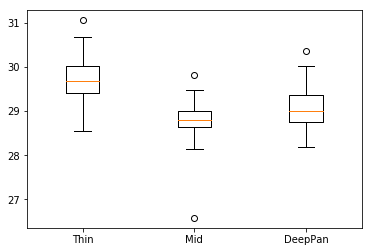

In [210]:
plt.figure("Boxploty EagleBoys")
plt.boxplot([np.array(data_EagleBoys[data_EagleBoys[:,1] == "Thin", -1],ndmin=2).T,
             np.array(data_EagleBoys[data_EagleBoys[:,1] == "Mid", -1],ndmin=2).T,
             np.array(data_EagleBoys[data_EagleBoys[:,1] == "DeepPan", -1],ndmin=2).T], 
            labels=["Thin", "Mid", "DeepPan"])
plt.show()

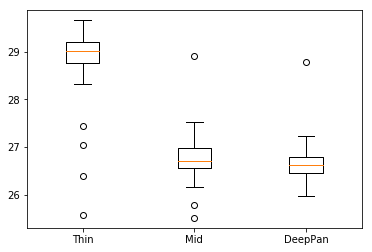

In [211]:
plt.figure("Boxploty Dominos")
plt.boxplot([np.array(data_Dominos[data_Dominos[:,1] == "Thin", -1],ndmin=2).T,
             np.array(data_Dominos[data_Dominos[:,1] == "Mid", -1],ndmin=2).T,
             np.array(data_Dominos[data_Dominos[:,1] == "DeepPan", -1],ndmin=2).T], 
            labels=["Thin", "Mid", "DeepPan"])
plt.show()